<a href="https://colab.research.google.com/github/SumeetsRoorkee/ML_Code/blob/main/Search_with_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the notebook

### Task 1 - Set up project environment

Installing the needed modules

In [10]:
! pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.0/812.0 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.16.2
    Uninstalling openai-1.16.2:
      Successfully uninstalled openai-1.16.2


Importing the needed modules and setup the OpenAI API

In [1]:
import pandas as pd
import numpy as np
import os
from openai import OpenAI
from dotenv import load_dotenv
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Loading API key and organization ID from a dotenv file
load_dotenv(dotenv_path='apikey.env.txt')

# Retrieving API key and organization ID from environment variables
APIKEY = os.getenv("APIKEY")
ORGID = os.getenv("ORGID")

# Creating an instance of the OpenAI client with the provided API key and organization ID
client = OpenAI(
  organization= ORGID,
  api_key=APIKEY
)

client

Import our dataset

In [2]:
data = pd.read_csv('/content/customer_reviews_dataset.csv')
data.head()

,customer_review
0,I'm amazed by the battery life! Lasts me throu...
1,"Delivery was prompt, received it within two da..."
2,"Setting up the product was a breeze, clear ins..."
3,The quality of this product exceeded my expect...
4,"Customer support was very helpful, they resolv..."


### Task 2 - Explore OpenAI's text embedding model

Import `text-embedding-3-small` text embedding model and try it out

In [6]:
model = 'text-embedding-3-small'
response = client.embeddings.create(
    input=['apple', 'orange'],
    model=model,
    dimensions=5
)
print("apple = ", response.data[0].embedding)
print("orange = ", response.data[1].embedding)

apple =  [0.33889809250831604, -0.32308128476142883, -0.8038653135299683, 0.36518189311027527, -0.03477368876338005]
orange =  [-0.3756333589553833, -0.08042331784963608, -0.0887966901063919, 0.7391934990882874, 0.5460217595100403]


Let's define a function to return the embedding of a text.

In [7]:
def get_embeddings(text_list, dimensions):
    """
    This function takes a list of texts as input and returns the embedding vectors using a specified OpenAI model and dimensionality.

    Args:
        text_list (list): The input list of texts to be embedded.
        dimensions (int): The dimensionality of the embedding vectors.

    Returns:
        list: A list containing the embedding vectors for the input texts.

    """

    # Specify the model to be used for embeddings
    model = 'text-embedding-3-small'

    # Create embeddings using the specified OpenAI model, input texts, and dimensions
    response = client.embeddings.create(
        input=text_list,
        model=model,
        dimensions=dimensions
    )

    # Extract embedding vectors from the response data
    vector_embeddings = []
    for data in response.data:
        vector_embeddings.append(data.embedding)

    return vector_embeddings


Let's get the vector embeddings of the following list of words

In [9]:
words = ['happy','laughter','cheerful','sad','crying']
vectors = get_embeddings(words, 2)
vectors

[[0.7148442268371582, -0.6992836594581604],
 [0.8340550065040588, -0.5516813397407532],
 [0.6187902092933655, -0.7855563163757324],
 [-0.04016091302037239, -0.9991931915283203],
 [-0.239254891872406, -0.9709567427635193]]

In [10]:
df = pd.DataFrame(vectors, columns=['vector_1', 'vector_2'], index=words)
df['word'] = words
df.head()

,vector_1,vector_2,word
happy,0.714844,-0.699284,happy
laughter,0.834055,-0.551681,laughter
cheerful,0.618790,-0.785556,cheerful
sad,-0.040161,-0.999193,sad
crying,-0.239255,-0.970957,crying


Create a DataFrame to store the words and their corresponding vector embeddings.

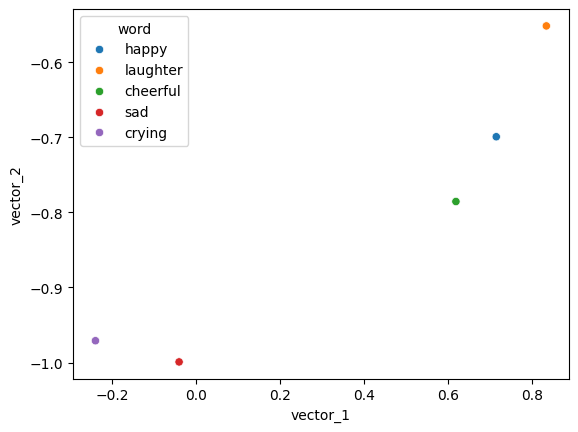

In [12]:
sns.scatterplot(data=df, x='vector_1', y='vector_2', hue='word')
plt.show()

Let's create a scatter plot to visualize the vector embeddings

In [13]:
data

,customer_review
0,I'm amazed by the battery life! Lasts me throu...
1,"Delivery was prompt, received it within two da..."
2,"Setting up the product was a breeze, clear ins..."
3,The quality of this product exceeded my expect...
4,"Customer support was very helpful, they resolv..."
...,...
70,"Customer support was helpful, although a bit s..."
71,"Product failed after a short period of use, ve..."
72,"Battery life is excellent, lasts me throughout..."
73,"Delivery was prompt, received it earlier than ..."


### Task 3 - Extract embedding vectors of the product reivews

In [17]:
reviews_list = data['customer_review'].tolist()
vectors = get_embeddings(reviews_list, 256)
vectors

[[0.03356051445007324,
  -0.040005605667829514,
  -0.04677295312285423,
  0.020808439701795578,
  -0.031857170164585114,
  -0.013822420500218868,
  -0.00518196914345026,
  0.036552879959344864,
  0.06270153820514679,
  0.01477767527103424,
  0.0006081836181692779,
  0.0738883763551712,
  -0.04815404489636421,
  -0.0032714596018195152,
  0.04727935418486595,
  0.08176059275865555,
  -0.1672961711883545,
  0.018149839714169502,
  0.018702276051044464,
  -0.014858239330351353,
  0.012729057110846043,
  0.0682719424366951,
  0.08226699382066727,
  -0.018587185069918633,
  -0.00709535600617528,
  -0.07356612384319305,
  -0.08885020017623901,
  0.03494160622358322,
  0.021395403891801834,
  -0.11610373109579086,
  -0.05749942734837532,
  -0.0444711335003376,
  0.022834040224552155,
  -0.12742868065834045,
  0.02718447707593441,
  0.009017374366521835,
  -0.046266552060842514,
  -0.06620030105113983,
  -0.02667807787656784,
  0.14823712408542633,
  -0.042629681527614594,
  -0.1155512928962707

Let's use the `get_embeddings` method to create vector embeddings for each review.





In [18]:
data['vectors'] = vectors
data.head()

,customer_review,vectors
0,I'm amazed by the battery life! Lasts me throu...,"[0.03356051445007324, -0.040005605667829514, -..."
1,"Delivery was prompt, received it within two da...","[-0.009103181771934032, -0.059874650090932846,..."
2,"Setting up the product was a breeze, clear ins...","[-0.06539943069219589, -0.031461089849472046, ..."
3,The quality of this product exceeded my expect...,"[0.10022071748971939, 0.007525474764406681, -0..."
4,"Customer support was very helpful, they resolv...","[-0.10889334231615067, -0.03702986612915993, -..."


Store the vectors into the dataframe

In [22]:
pca = PCA(n_components=2)
vector_2D = pca.fit_transform(vectors)
vector_2D

array([[-0.48831447, -0.04571904],
       [ 0.17499546,  0.06723394],
       [ 0.43989697,  0.18017886],
       [-0.05623519,  0.4437329 ],
       [ 0.3434723 , -0.22007739],
       [-0.30034275,  0.06654898],
       [-0.56501568, -0.19388719],
       [ 0.09605818, -0.21559491],
       [ 0.40063919, -0.24621379],
       [-0.21086995,  0.25807961],
       [ 0.15788567, -0.51233248],
       [-0.24541239, -0.14191955],
       [-0.56320998, -0.23617924],
       [ 0.20253523,  0.13273538],
       [ 0.37155175,  0.06235784],
       [-0.06524349,  0.71045287],
       [ 0.24085536, -0.22512791],
       [-0.28006036,  0.149574  ],
       [-0.5893531 , -0.31944334],
       [ 0.07038334, -0.13859861],
       [ 0.45608177, -0.30537841],
       [-0.17311404,  0.06645693],
       [ 0.169276  , -0.3911375 ],
       [-0.29923221, -0.13426951],
       [-0.5709792 , -0.04911057],
       [ 0.09272174,  0.10680493],
       [ 0.39276922,  0.039423  ],
       [-0.10364254,  0.46081919],
       [ 0.30246764,

### Task 4 - Visualize the embedding vectors

> We know that each vector has 128 elements, or in other words, dimensions. We can visualize the vectors to see how many different types or categories we have in our reviews. In order to be able to visualize the vectors in a scatter plot, we need to use Principal Component Analysis (PCA) to reduce the dimension from 128 to 2.


In [24]:
data['vector_2D'] = vector_2D.tolist()
data.head()

,customer_review,vectors,vector_2D
0,I'm amazed by the battery life! Lasts me throu...,"[0.03356051445007324, -0.040005605667829514, -...","[-0.48831447052805305, -0.04571904030945409]"
1,"Delivery was prompt, received it within two da...","[-0.009103181771934032, -0.059874650090932846,...","[0.1749954550718606, 0.06723394260699066]"
2,"Setting up the product was a breeze, clear ins...","[-0.06539943069219589, -0.031461089849472046, ...","[0.4398969735815452, 0.1801788559554646]"
3,The quality of this product exceeded my expect...,"[0.10022071748971939, 0.007525474764406681, -0...","[-0.05623519454992831, 0.4437328993350664]"
4,"Customer support was very helpful, they resolv...","[-0.10889334231615067, -0.03702986612915993, -...","[0.34347229591355427, -0.22007738621050268]"


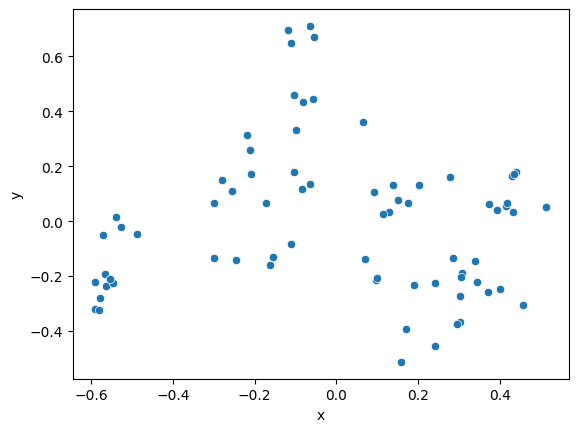

In [27]:
x, y = [],[]
for vector in data['vector_2D']:
    x.append(vector[0])
    y.append(vector[1])
data['x'] = x
data['y'] = y
data.head()
sns.scatterplot(data=data, x='x', y='y')
plt.show()

Let's add the 2D vectors to our dataframe

In [44]:
search_phrase = 'Easy Setup'

> **Exercise:** Now use a scatter plot to visualize the `vector_2D` column. <br>
 Think about why the data points are positioned as they are on the chart.

In [45]:
from re import search
search_phrase_vector = get_embeddings([search_phrase], 256)
search_phrase_vector

[[-0.05953330174088478,
  -0.049237076193094254,
  -0.05385717749595642,
  -0.10065220296382904,
  -0.014239811338484287,
  -0.062338363379240036,
  0.08157778531312943,
  0.0391058549284935,
  -0.006546518299728632,
  0.03158169239759445,
  0.06567143648862839,
  -0.02724209614098072,
  0.02503104694187641,
  0.034782759845256805,
  0.10309425741434097,
  -0.039567865431308746,
  -0.09590009599924088,
  0.035409774631261826,
  0.01069223415106535,
  0.10408427566289902,
  0.10131222009658813,
  -0.008992697112262249,
  0.009974468499422073,
  0.0638233944773674,
  0.004512848798185587,
  0.03498076647520065,
  -0.04233992472290993,
  0.01321678888052702,
  -0.02143396995961666,
  -0.11735057085752487,
  -0.021285464987158775,
  -0.09451407194137573,
  0.04636601358652115,
  -0.03854484483599663,
  0.027011090889573097,
  0.04540899395942688,
  0.021681474521756172,
  0.008394558914005756,
  -0.05940129980444908,
  0.06250336766242981,
  0.037059810012578964,
  0.00027277160552330315,


### Task 5 - Perform text-based search

Defining an example `search_phrase`

In [46]:
review = data.iloc[0].customer_review
vector = data.iloc[0].vectors
print(review)
cosine_similarity(search_phrase_vector, [vector])[0][0]

Customer support was fantastic, they went out of their way to assist me.


np.float64(0.20285849729920802)

Let's find the vector embedding of the `search_phrase`

In [47]:
def get_similarity(product_review_vector):
  return cosine_similarity(search_phrase_vector, [product_review_vector])[0][0]

data['similarity_with_search_phrase'] = data.vectors.apply(get_similarity)

Let's use `cosine_similarity` to find the similarity of the search phrase to each of the product review vectors we have. This will enable us to sort out the similar product reviews that are similar to the search phrase.

In [48]:
data.sort_values(by='similarity_with_search_phrase', ascending=False, inplace=True)
data.head(10).customer_review

,customer_review
14,"Setup was straightforward, had no issues getti..."
2,"Setting up the product was a breeze, clear ins..."
68,"Setup process was straightforward, had it up a..."
62,"Setting up the product was a breeze, clear ins..."
26,"Setup process was smooth sailing, no hiccups w..."
32,"Setup was a bit tricky, had to consult custome..."
56,"Setup process was smooth, had no trouble at all."
38,"Setting up the product was a breeze, thanks to..."
44,"Setup process was straightforward, had no trou..."
50,Setup instructions were clear and easy to follow.


Retrieve the top 10 product reviews that are similar to the search phrase.

In [7]:
# Assuming the dataset is named 'product_reviews.csv' and is in the same directory
reviews_df = pd.read_csv('product_reviews.csv')
display(reviews_df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'product_reviews.csv'